# `pyslk.parsers` examples

The main purpose of the `pyslk.parsers` module is to parse the raw output of `slk` commands into a `pandas` dataframe object. This should enable users to conveniently keep overview on their archive contents and make automated archiving and retrieving more convenient. 

In [1]:
from pyslk import parsers as prs
from pyslk import pyslk as slk

In [3]:
slk.slk_tape_exists(132000)

'Tape with id 132000 exists.'

In [5]:
print(slk.slk_group_files_by_tape("/arch/bm0146/k204221/iow"))

    cached: /arch/bm0146/k204221/iow/INDEX.txt
      tape: /arch/bm0146/k204221/iow/iow_data_006.tar
      tape: /arch/bm0146/k204221/iow/iow_data5_006.tar, /arch/bm0146/k204221/iow/iow_data5_002.tar
      tape: /arch/bm0146/k204221/iow/iow_data_001.tar, /arch/bm0146/k204221/iow/iow_data3_002.tar, /arch/bm0146/k204221/iow/iow_data2_004.tar
      tape: /arch/bm0146/k204221/iow/iow_data2_001.tar
      tape: /arch/bm0146/k204221/iow/iow_data_002.tar, /arch/bm0146/k204221/iow/iow_data5_005.tar, /arch/bm0146/k204221/iow/iow_data3_001.tar, /arch/bm0146/k204221/iow/iow_data2_003.tar
      tape: /arch/bm0146/k204221/iow/iow_data5_003.tar
      tape: /arch/bm0146/k204221/iow/iow_data_005.tar, /arch/bm0146/k204221/iow/iow_data_004.tar, /arch/bm0146/k204221/iow/iow_data5_004.tar, /arch/bm0146/k204221/iow/iow_data5_001.tar, /arch/bm0146/k204221/iow/iow_data2_002.tar
      tape: /arch/bm0146/k204221/iow/iow_data_003.tar, /arch/bm0146/k204221/iow/iow_data4_002.tar
      tape: /arch/bm0146/k204221/io

Retrieve a list of all files in the Reklies project, note that large archives might take a considerable amount of time to list recursively. So it's a good idea, to store the contents.

In [2]:
%time df = prs.slk_list_formatted('/arch/bb0931', recursive=True)

/mnt/lustre01/pf/zmaw/g300046/python/packages/pyslk/pyslk/utils.py:121: UserWarning: pyslk._parse_size: file size cannot be converted: ; return NaN instead
  warnings.warn(f"pyslk.{inspect.stack()[0][3]}: file size cannot be "


CPU times: user 17.3 s, sys: 3.54 s, total: 20.8 s
Wall time: 4min 37s


In [4]:
df.head()

permissions       owner   group   filesize       date  \
0  -rw-r-----t  stronglink  bb0931  6600000.0 2021-10-14   
1  drwxr-x----       23364  bm0146        NaN 2020-02-13   
2  drwxrwxr-x-     g300046  bb0931        NaN 2019-08-01   
3  drwxrwxr-x-     g300047  bb0931        NaN 2021-01-15   
4  drwxr-x----       23364  bm0146        NaN 2020-11-19   

                                      filename  
0  /arch/bb0931/_PROJECT.bb0931.file-list.GIGA  
1                         /arch/bb0931/b380460  
2                         /arch/bb0931/g300046  
3                         /arch/bb0931/g300047  
4                         /arch/bb0931/k204081

Write to csv:

In [5]:
df.to_csv("bb0931.csv", index=False)

Get an overview

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59655 entries, 0 to 59654
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   permissions  59655 non-null  object        
 1   owner        59655 non-null  object        
 2   group        59655 non-null  object        
 3   filesize     58122 non-null  float64       
 4   date         59655 non-null  datetime64[ns]
 5   filename     59655 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 2.7+ MB


Check out total size of the archive:

In [10]:
df.filesize.sum() / 1.0e12  # TB

932.47793861

## Plotting

In [32]:
df.dropna().drop(df.loc[df["owner"] == "stronglink"].index).owner.unique()

array(['g300046', 'g300047'], dtype=object)

Plot archive size by owner:

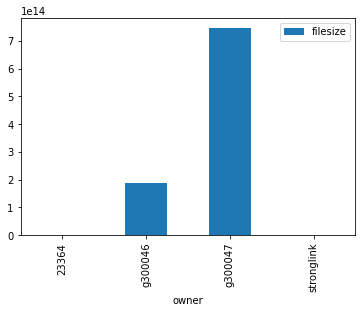

In [25]:
df.groupby("owner").sum("filesize").plot.bar()

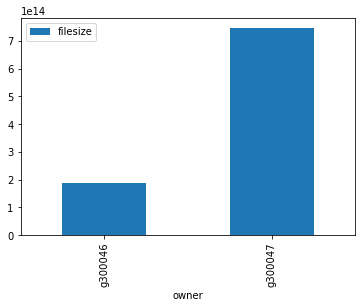

In [33]:
df.dropna().drop(df.loc[df["owner"] == "stronglink"].index).groupby("owner").sum(
    "filesize"
).plot.bar()

Histogram of filesizes:

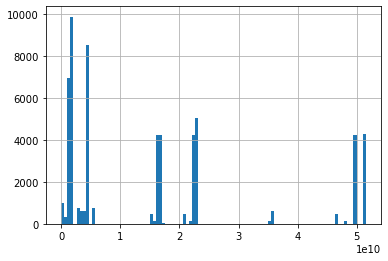

In [38]:
df.filesize.hist(bins=100)